####  ADMN5016 Assignment 
####  Proof of Concept for Machine Learning Application  


####  Business Analytics, St Lawrence College - Kingston  

####  Saranya Rajasekhar Nair 
####  Elvis  Ramirez - Student ID: 4354150                    

## I. About the Problem Statement ✔️

This study aims to provide precise insights into the current salary trajectories within the data science realm by examining the complex interconnections among various factors. and we leverage the dataset, containing information such as work years, experience level, employment type, job title, salary details, employee residence, remote work ratio, company location, and company size, to create a machine learning model. Based on the provided data profiles, this model will be specifically developed to accurately predict salaries for different job positions. 

Furthermore, the implementation of this machine learning model can significantly improve a company's process. By utilizing the predictions generated by the model, the company can enhance its salary structuring and decision-making processes. The model can assist in determining competitive compensation packages, optimizing resource allocation, and aligning salaries with industry standards.

## II. Domain Knowledge ✔️ 

#### work_year [categorical] : 
This represents the specific year in which the salary was disbursed. Different years may have different economic conditions which can impact the salary level.

#### experience_level [categorical] : 
The level of experience a person holds in a particular job. This is a key determinant in salary calculation as typically, more experienced individuals receive higher pay due to their advanced skills and knowledge.

#### employment_type [categorical] : 
The nature of the employment contract such as full-time, part-time, or contractual can greatly influence the salary. Full-time employees often have higher annual salaries compared to their part-time or contractual counterparts.

####  job_title [categorical] : 
The role an individual holds within a company. Different roles have different salary scales based on the responsibilities and skills required. For example, managerial roles typically pay more than entry-level positions.

#### salary [numerical] : 
The total gross salary paid to the individual. This is directly influenced by factors such as experience level, job title, and employment type.

#### salary_currency [categorical] : 
The specific currency in which the salary is paid, denoted by an ISO 4217 code. Exchange rates could affect the value of the salary when converted into different currencies.

#### salaryinusd [numerical] : 
The total gross salary amount converted to US dollars. This allows for a uniform comparison of salaries across different countries and currencies.

#### employee_residence [categorical]: 
The primary country of residence of the employee, denoted by an ISO 3166 code. The cost of living and prevailing wage rates in the employee's country of residence can impact salary levels.

#### remote_ratio [ratio]: 
The proportion of work done remotely. With the rise of remote work, companies may adjust salaries based on the cost of living in the employee's location and the proportion of remote work.

#### company_location [categorical]: 
The location of the employer's main office or the branch that holds the contract. Companies in different locations may offer different salary scales due to varying economic conditions and cost of living.

#### company_size [categorical]: 
The median number of employees in the company during the work year. Larger companies often have structured salary scales and may offer higher salaries due to economies of scale and larger revenue streams.

✔️ These variables, in combination with appropriate statistical and machine learning techniques, can help predict an individual's salary.

# III. Import Dataset, and the required libraries ✔️ 

In [91]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Statistics libraries
from scipy import stats
from scipy.stats import norm

# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier

# Import country code libraries
!pip install pycountry -q
import pycountry

#Install plot library
import plotly.io as pio

## IV. Input Data ✔️ 

In [3]:
mySalariesDF = pd.read_csv('C:/datasets2/ds_salaries.csv')

In [4]:
mySalariesDF.shape

(3755, 11)

In [5]:
mySalariesDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## 1.0 EXPLORATORY DATA ANALYSIS ✔️ 

## 1.1 | Data Quality

### Check null and Missing Values

In [7]:
#check missing ratio
data_na = (mySalariesDF.isnull().sum() / len(mySalariesDF)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


### Check Duplicates

In [8]:
# Handle duplicates
duplicate_rows_data = mySalariesDF[mySalariesDF.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1171, 11)


### Check Unique Value in each columns 

In [9]:
for column in mySalariesDF.columns:
    num_distinct_values = len(mySalariesDF[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

work_year: 4 distinct values
experience_level: 4 distinct values
employment_type: 4 distinct values
job_title: 93 distinct values
salary: 815 distinct values
salary_currency: 20 distinct values
salary_in_usd: 1035 distinct values
employee_residence: 78 distinct values
remote_ratio: 3 distinct values
company_location: 72 distinct values
company_size: 3 distinct values


### Explore the data

In [10]:
mySalariesDF.shape

(3755, 11)

In [11]:
mySalariesDF.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [12]:
mySalariesDF.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [13]:
# Descriptive stats
print(mySalariesDF.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


## 2.0 FEATURES ENGINEERING ✔️ 

### Rename the value for better understanding

In [16]:
mySalariesDF['experience_level'] = mySalariesDF['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

mySalariesDF['employment_type'] = mySalariesDF['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
mySalariesDF['company_size'] = mySalariesDF['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})
mySalariesDF['remote_ratio'] = mySalariesDF['remote_ratio'].astype(str)
mySalariesDF['remote_ratio'] = mySalariesDF['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

### Group the job title

In [18]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
mySalariesDF['job_category'] = mySalariesDF['job_title'].apply(assign_broader_category)

In [19]:
mySalariesDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,LARGE,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,MEDIUM,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,LARGE,Data Science
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,LARGE,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,SMALL,Data Science
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,LARGE,Data Engineering


# 3.0 Univariative Analysis ✔️ 

### Job Distribution

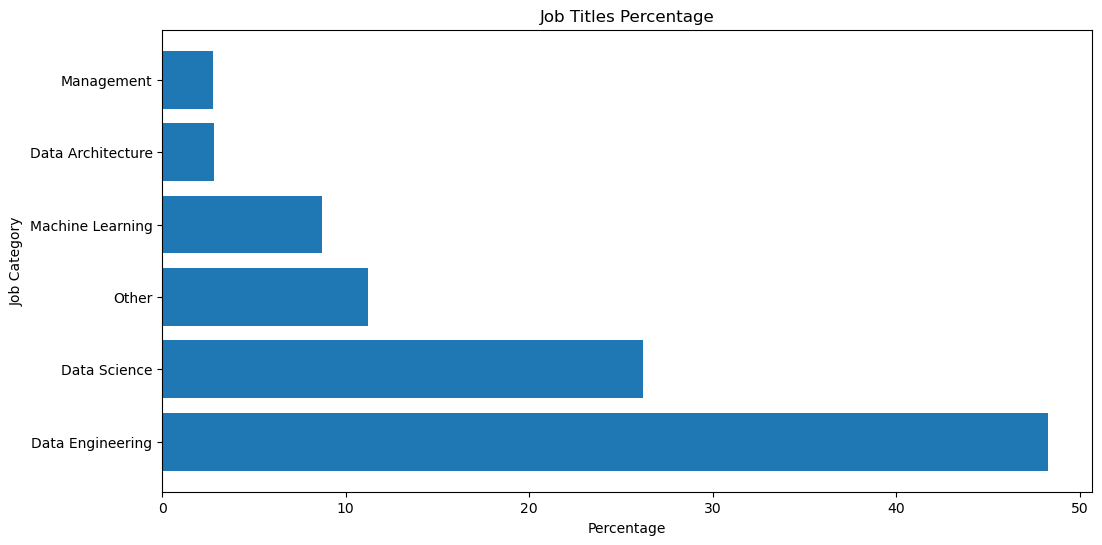

In [22]:
value_counts = mySalariesDF['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

### Distribution across different employment types

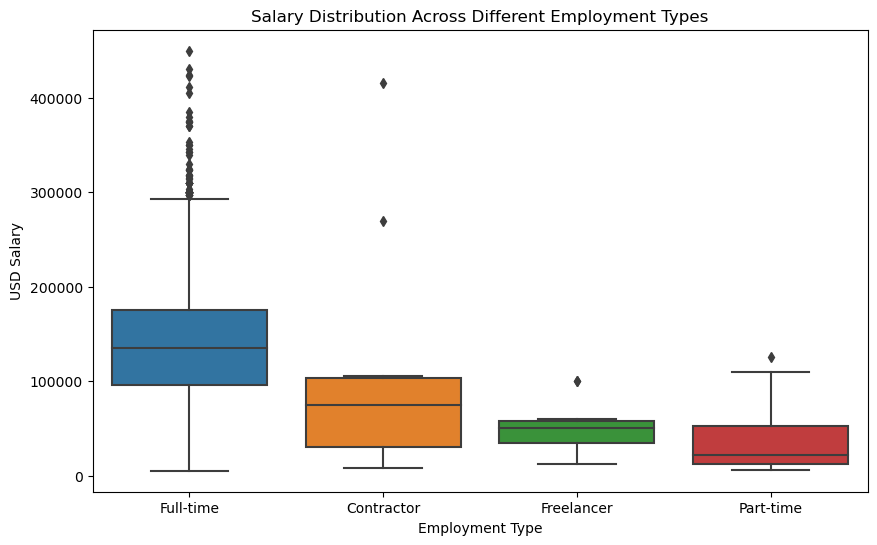

In [23]:
# Salary distribution across different employment types
plt.figure(figsize=(10, 6))
sns.boxplot(data=mySalariesDF, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('USD Salary')
plt.show()


In [24]:
mySalariesDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,LARGE,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,MEDIUM,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,LARGE,Data Science
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,LARGE,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,SMALL,Data Science
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,LARGE,Data Engineering


### Create and analyze box plots for each Categorical feature grouped by salary_in_usd

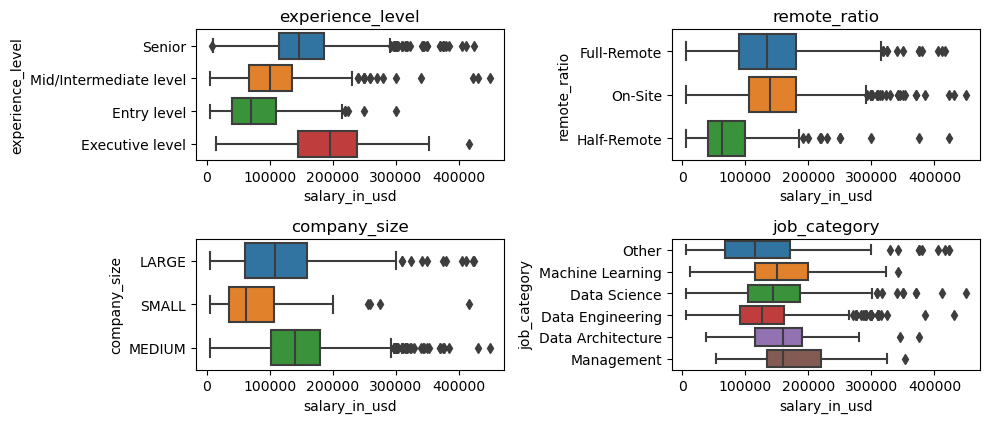

In [30]:
##### Specify the columns
feautures_columns = ['experience_level', 'remote_ratio', 'company_size', 'job_category']

# Set the figure size
plt.figure(figsize=(10, 6))


for feature in feautures_columns:
    plt.subplot(3, 2, feautures_columns.index(feature) + 1)
    sns.boxplot(x='salary_in_usd', y=feature, data=mySalariesDF)
    plt.title(feature)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

### Distribution of Salary

salary_in_usd: mu = 137570.39, sigma = 63047.23
salary_in_usd: Skewness: 0.54
salary_in_usd: Kurtosis: 0.83


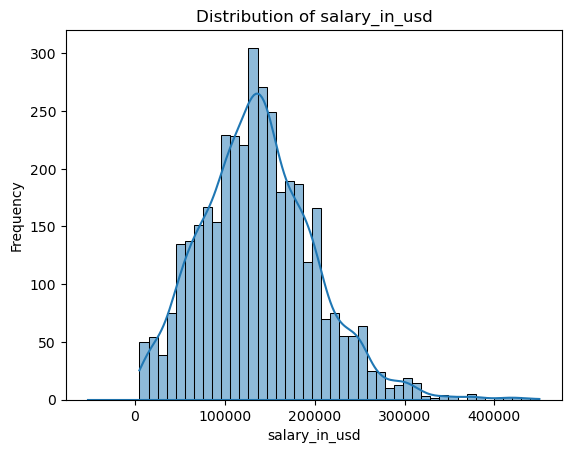

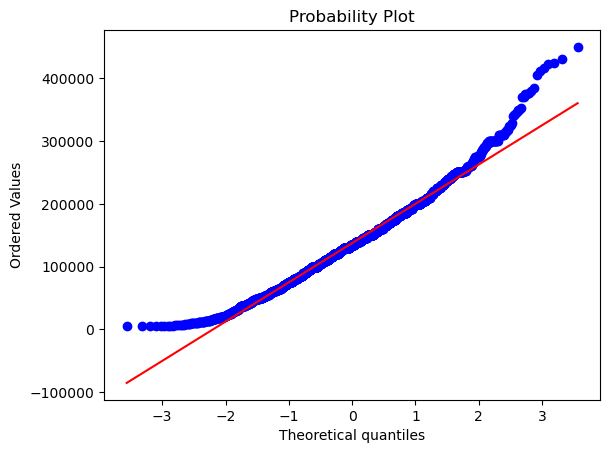

In [32]:
# Create a list of the columns to analyze
columns = ['salary_in_usd']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(mySalariesDF[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(mySalariesDF[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, mySalariesDF[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, mySalariesDF[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

    # Plot the QQ-plot
    fig = plt.figure()
    stats.probplot(mySalariesDF[col], plot=plt)

    plt.show()

### Boxplot and Swarmplot of Salary

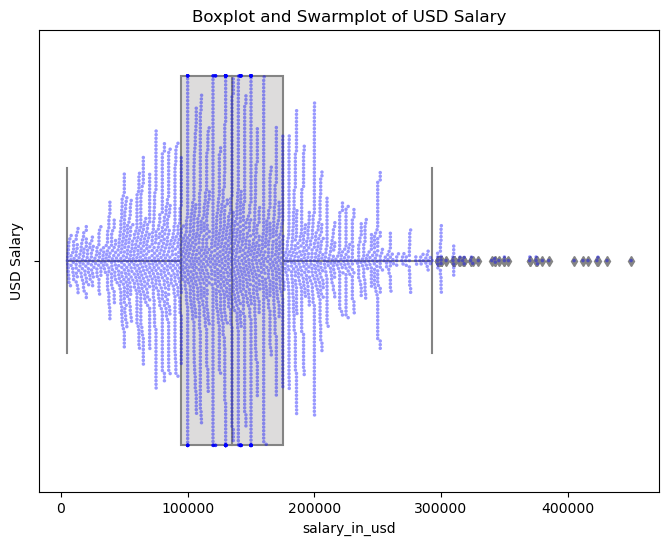

,salary_in_usd
count,3755.00
mean,137570.39
std,63055.63
min,5132.00
25%,95000.00
50%,135000.00
75%,175000.00
max,450000.00


In [33]:
# apply formatting to describe method for 'salary_in_usd' column
formatted_data = mySalariesDF.loc[:, 'salary_in_usd'].describe().apply(lambda x: f'{x:.2f}')

# create boxplot and swarmplot for 'salary_in_usd' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=mySalariesDF['salary_in_usd'], palette='coolwarm')
sns.swarmplot(x=mySalariesDF['salary_in_usd'], color='blue', alpha=0.4, size=2.5)
plt.ylabel('USD Salary')
plt.title('Boxplot and Swarmplot of USD Salary')
plt.show()

# apply styling to formatted data
styled_data = formatted_data.to_frame().style \
    .background_gradient(cmap='Blues') \
    .set_properties(**{'text-align': 'center', 'border': '1px solid black'})

# display styled data
display(styled_data)

# 4.0 Bivariative Analysis ✔️ 

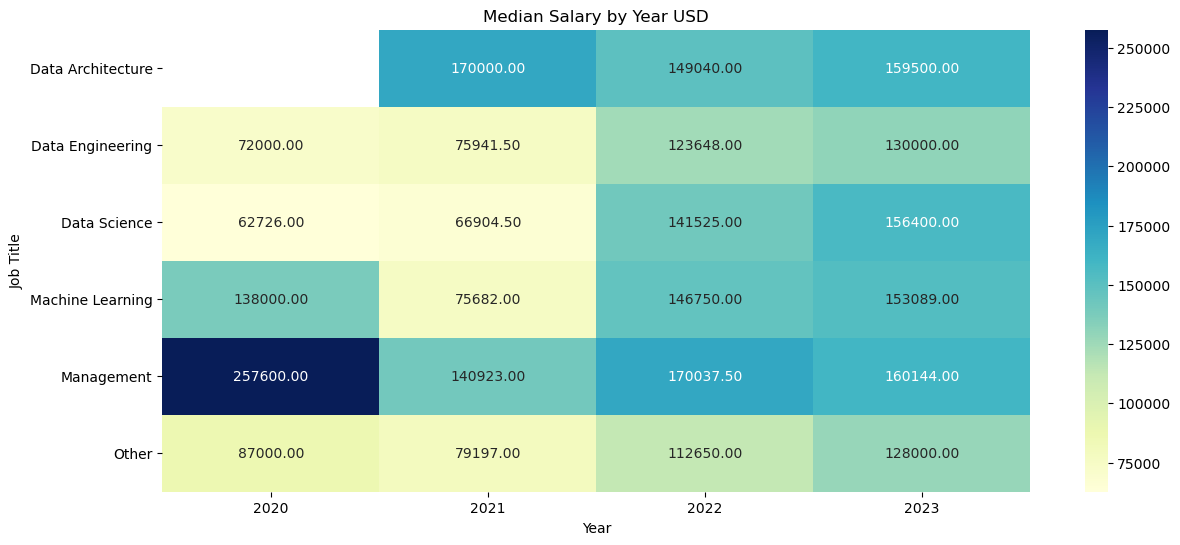

In [35]:
#  Median salary by job title
pivot_table = mySalariesDF.pivot_table(values='salary_in_usd', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Median Salary by Year USD')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

### Salary comparison between employee residence and company location

In [39]:

# Function to convert ISO 3166 country code to country name
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
    # Function to convert country code to full name
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

In [41]:
# Convert country codes to names
mySalariesDF['company_location'] = mySalariesDF['company_location'].apply(country_code_to_name)
mySalariesDF['employee_residence'] = mySalariesDF['employee_residence'].apply(country_code_to_name)

In [43]:
mySalariesDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Full-Remote,Spain,LARGE,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,United States,Full-Remote,United States,SMALL,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,United States,Full-Remote,United States,SMALL,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Full-Remote,Canada,MEDIUM,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Full-Remote,Canada,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Full-Remote,United States,LARGE,Data Science
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Full-Remote,United States,LARGE,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,United States,Full-Remote,United States,SMALL,Data Science
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,United States,Full-Remote,United States,LARGE,Data Engineering


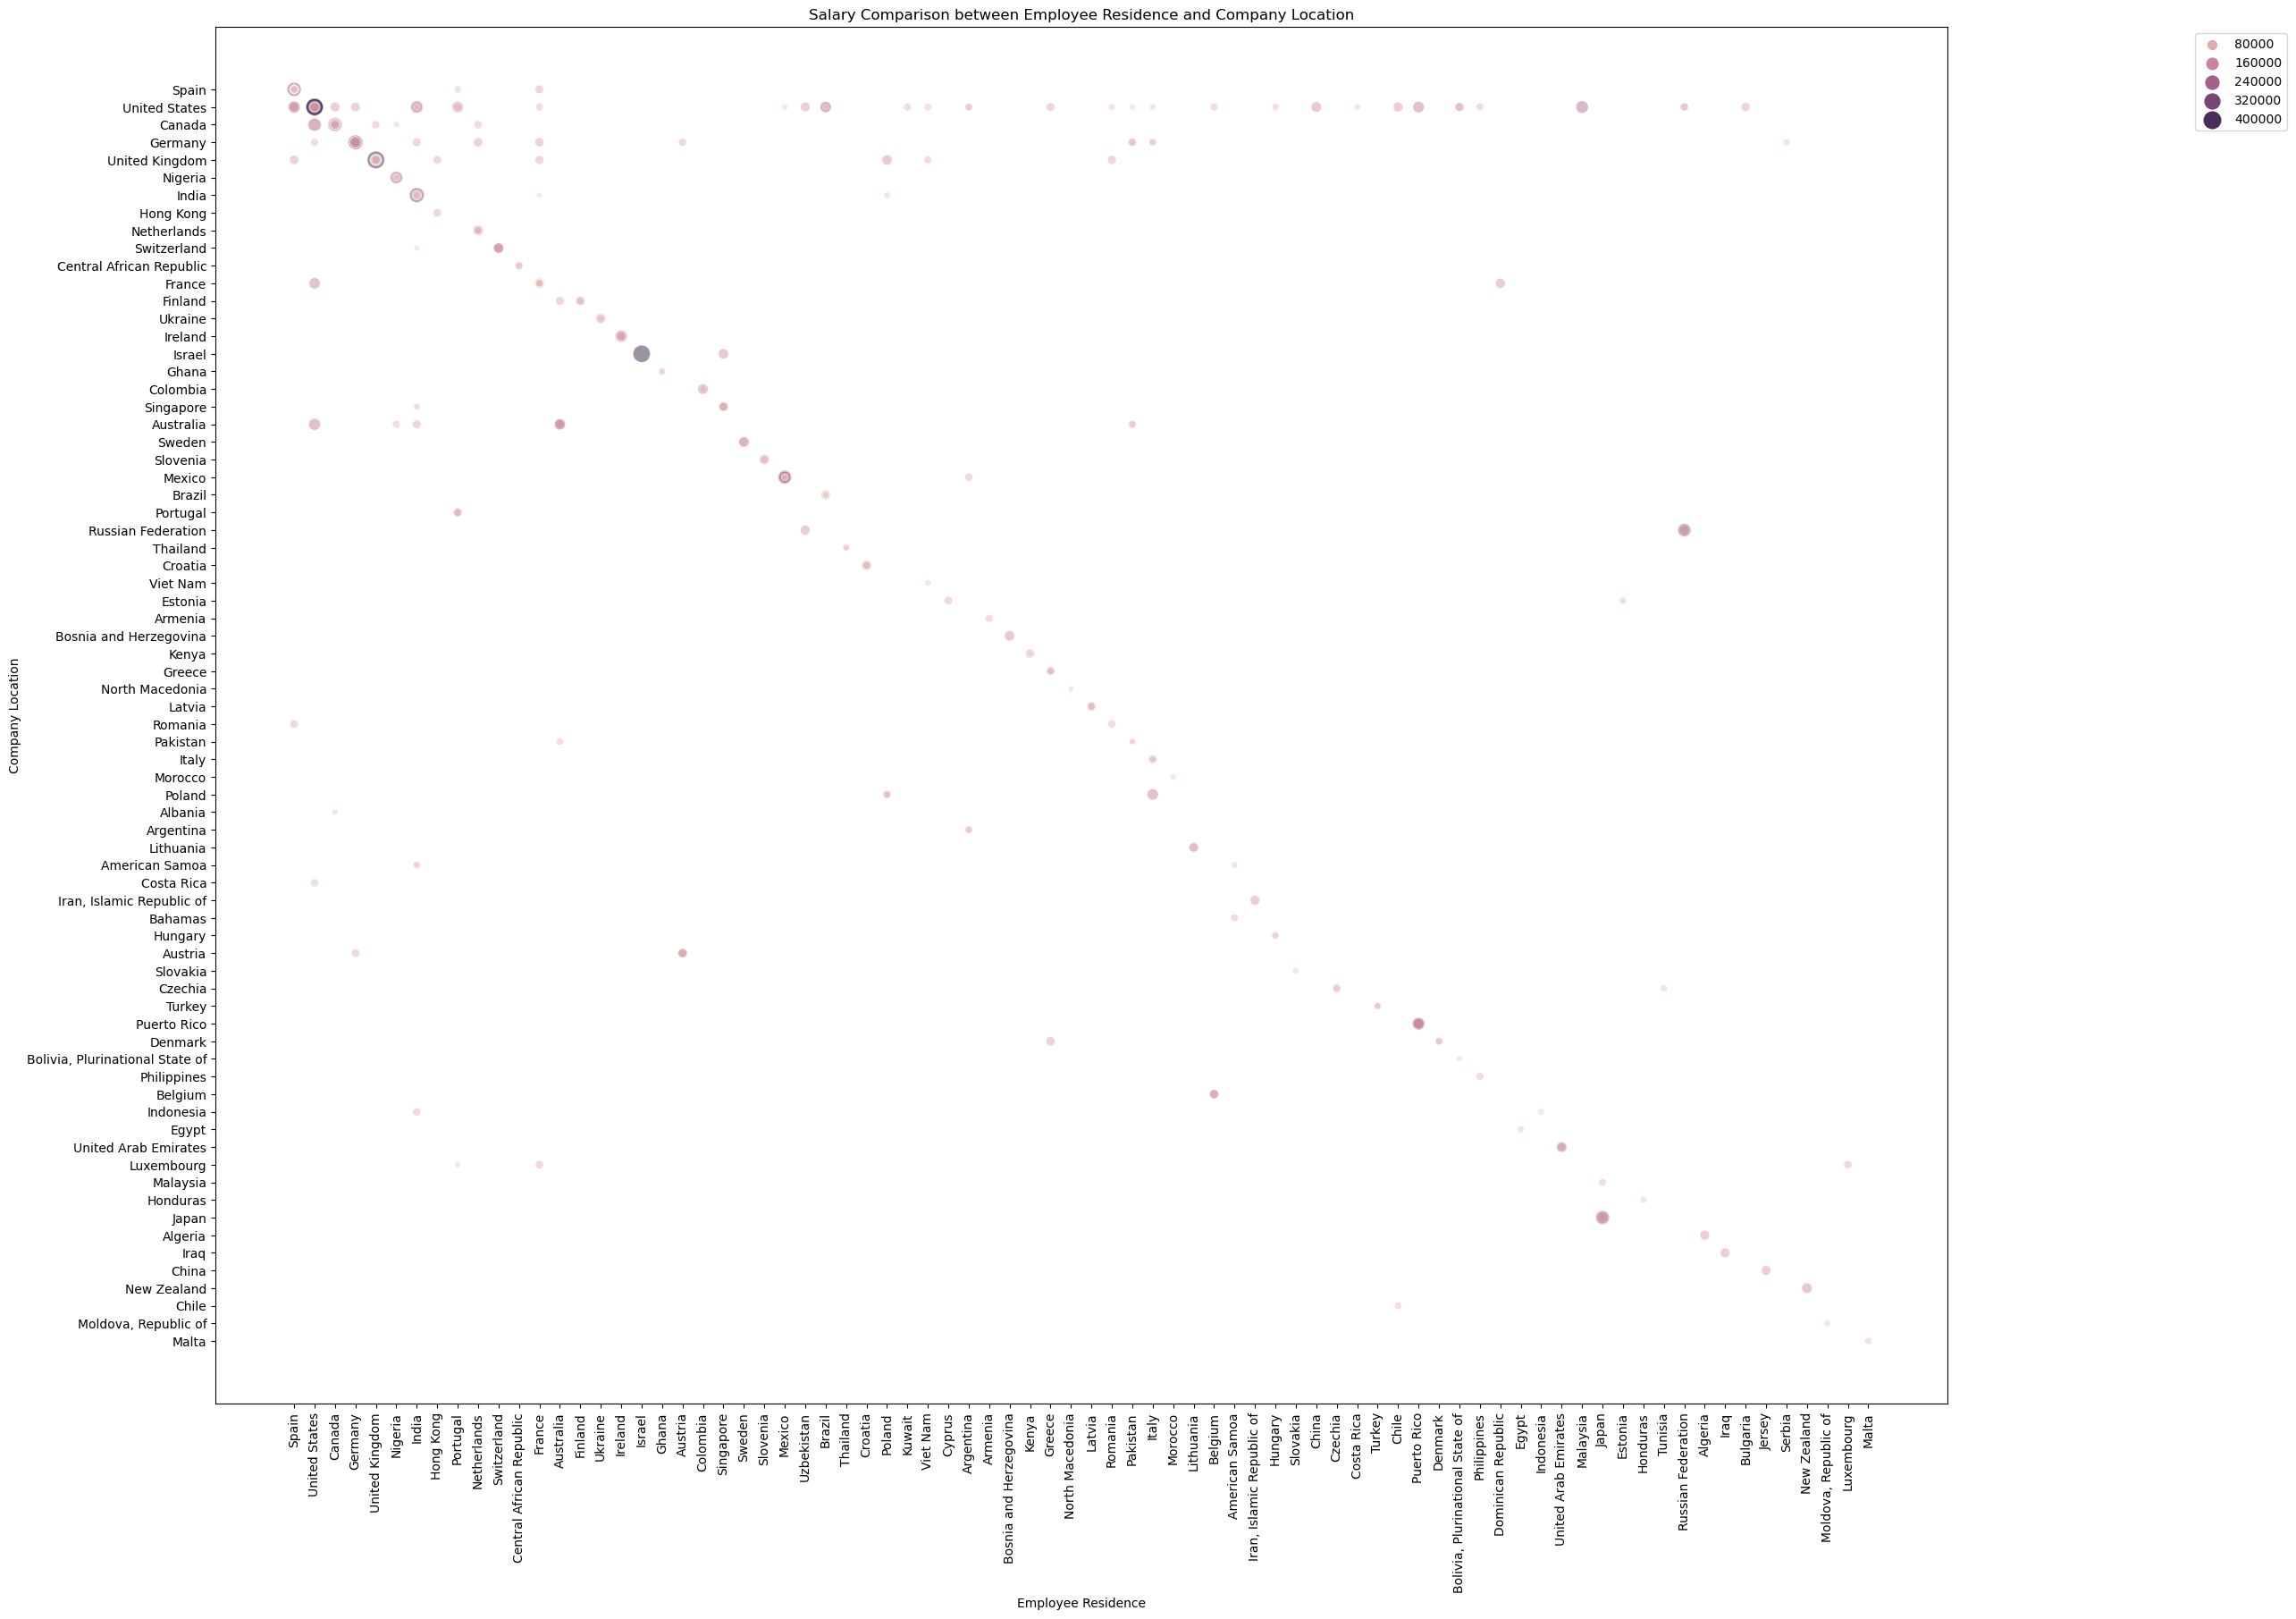

In [51]:
# Salary comparison between employee residence and company location
plt.figure(figsize=(25, 20))
sns.scatterplot(data=mySalariesDF, x='employee_residence', y='company_location', 
                hue='salary_in_usd', size='salary_in_usd', sizes=(20, 200), alpha=0.5)
plt.title('Salary Comparison between Employee Residence and Company Location')
plt.xlabel('Employee Residence')
plt.ylabel('Company Location')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# 5.0 Geospatial Analysis ✔️ 

### Average salary by location

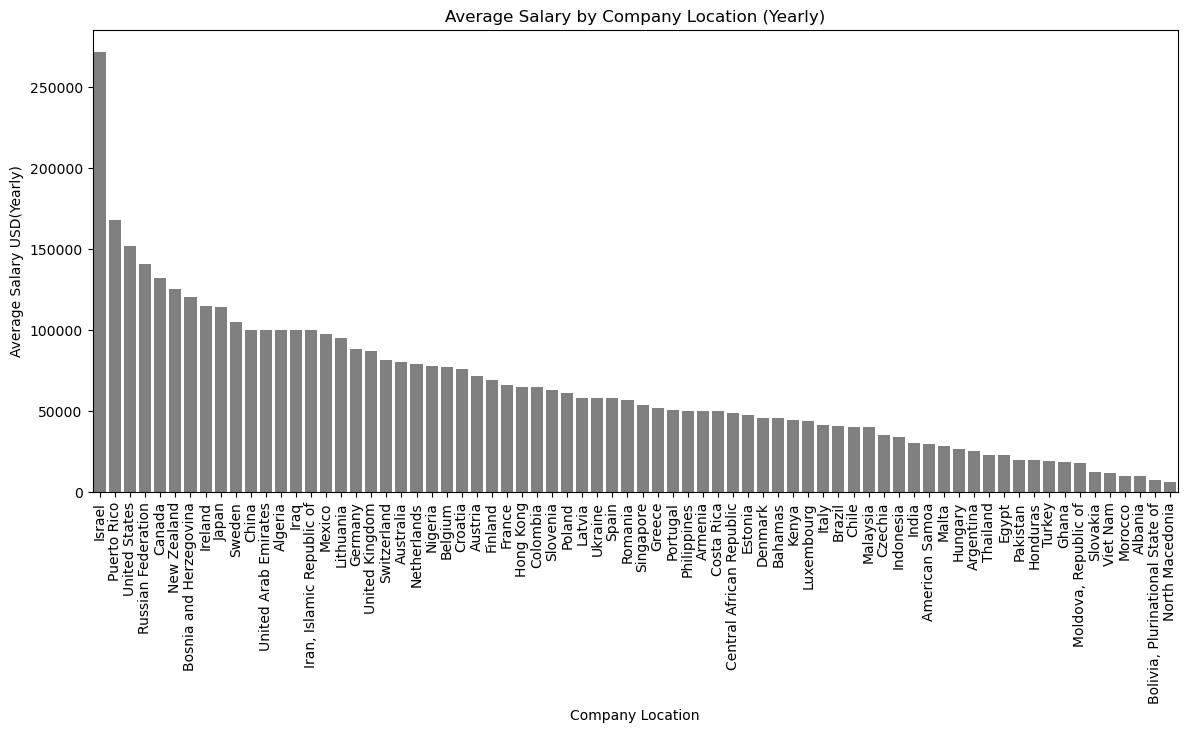

In [54]:
# Average salary by company_location
avg_salary_by_location = mySalariesDF.groupby('company_location', as_index=False)['salary_in_usd'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'salary_in_usd': 'Average USD Salary'},
                     projection='natural earth')

fig1.show()

# Average salary by company_location
avg_salary_by_location = mySalariesDF.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location, color='grey')
plt.title('Average Salary by Company Location (Yearly)')
plt.xlabel('Company Location')
plt.ylabel('Average Salary USD(Yearly)')
plt.xticks(rotation=90)
plt.show()

### Which country generate the highest wages

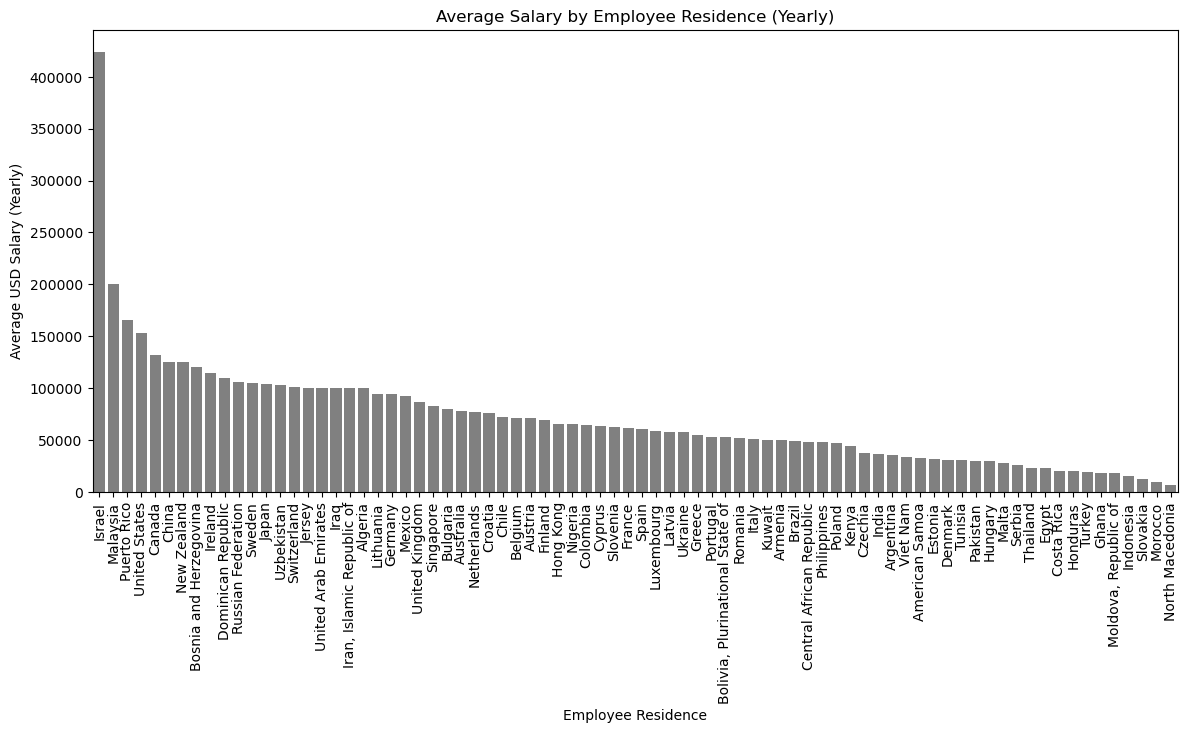

In [55]:
# Average salary by employee_residence
avg_salary_by_residence = mySalariesDF.groupby('employee_residence', as_index=False)['salary_in_usd'].mean()

fig2 = px.choropleth(avg_salary_by_residence,
                     locations='employee_residence',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='employee_residence',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Employee Residence',
                     labels={'salary_in_usd': 'Average USD Salary'},
                     projection='natural earth')

fig2.show()

# Average salary by employee_residence
avg_salary_by_residence = mySalariesDF.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_salary_by_residence.index, y=avg_salary_by_residence.values, color='grey')
plt.title('Average Salary by Employee Residence (Yearly)')
plt.xlabel('Employee Residence')
plt.ylabel('Average USD Salary (Yearly)')
plt.xticks(rotation=90)
plt.show()

### Which country doesn't demand that you work on the job

In [59]:
# Filter for remote_ratio of 100
remote_100 = mySalariesDF[mySalariesDF['remote_ratio'] == 'Full-Remote']

# Aggregate by country code
country_counts = remote_100['company_location'].value_counts().reset_index()
country_counts.columns = ['country_code', 'count']

# Convert country codes to full names
country_counts['country_name'] = country_counts['country_code'].apply(country_code_to_name)

# Create the choropleth map with a logarithmic color scale
fig = px.choropleth(country_counts, 
                    locations='country_name', 
                    locationmode='country names',
                    color=np.log10(country_counts['count']), 
                    hover_name='country_name',
                    hover_data=['count'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Choropleth Map of Full-Remote Company Locations',
                    projection='natural earth')

# Customize the colorbar to show the original count values
fig.update_coloraxes(colorbar=dict(title='Count (Log Scale)', tickvals=[0, 1, 2, 3], ticktext=['1', '10', '100', '1000']))

# Show the map
fig.show()

### Summary of Findings 

The distribution of salaries reveals that most data professionals earn between $95,000 and 175,000 USD per anunum. However, there are a few high earners that make significantly more than the average.

The average salary by company location shows that data working for companies based in countries such as Israel, USA, and Russia tend to have higher average salaries. On the other hand, companies located in region like South East Asia, Africa, and Eastern Europe pay comparatively lower average salaries to data science professionals.

The analysis of average salary by employee residence indicates that data professionales residing in countries like Israel, USA, and Malaysia generally earn higher average salaries. Conversely, data proferssionals living in countries like Slovakia, Morocco, and North Macedonia have lower average salaries.

The salary comparison between employee residence and company location reveals that while some data profesionales earn high salaries by working for companies based in countries with high-paying job markets, others may need to relocate or work remotely to benefit from these opportunities.

In conclusion, this analysis of data job salaries highlights the impact of various factors, such as company location and employee residence, on salary trends. By understanding these patterns, job seekers and employers can make informed decisions about job opportunities, compensation packages, and talent acquisition strategies.

# 6.0 Correlation✔️

### Dealing with categorical and numerical column

##### Select Columns


In [61]:
mySalariesDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Full-Remote,Spain,LARGE,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,United States,Full-Remote,United States,SMALL,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,United States,Full-Remote,United States,SMALL,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Full-Remote,Canada,MEDIUM,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Full-Remote,Canada,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Full-Remote,United States,LARGE,Data Science
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Full-Remote,United States,LARGE,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,United States,Full-Remote,United States,SMALL,Data Science
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,United States,Full-Remote,United States,LARGE,Data Engineering


In [62]:
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['salary_in_usd']

### Dealing with categorical variable

In [64]:
dummy_variables = pd.get_dummies(mySalariesDF, columns=categorical_columns, drop_first=False)

In [65]:
dummy_variables

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,experience_level_Entry level,experience_level_Executive level,experience_level_Mid/Intermediate level,...,remote_ratio_On-Site,company_size_LARGE,company_size_MEDIUM,company_size_SMALL,job_category_Data Architecture,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other
0,2023,Principal Data Scientist,80000,EUR,85847,Spain,Spain,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2023,ML Engineer,30000,USD,30000,United States,United States,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,2023,ML Engineer,25500,USD,25500,United States,United States,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,2023,Data Scientist,175000,USD,175000,Canada,Canada,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2023,Data Scientist,120000,USD,120000,Canada,Canada,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Data Scientist,412000,USD,412000,United States,United States,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3751,2021,Principal Data Scientist,151000,USD,151000,United States,United States,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3752,2020,Data Scientist,105000,USD,105000,United States,United States,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3753,2020,Business Data Analyst,100000,USD,100000,United States,United States,1,0,0,...,0,1,0,0,0,1,0,0,0,0


### Preprocessing and Scaling the data¶
Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. Standardization is not required for all models but is generally a good practice. One-hot encoding is necessary for categorical variables to be correctly understood by the machine learning model.

### Preprocessing : Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(mySalariesDF[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [67]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary'], axis=1)

### Corelation Matrix with dummy variables

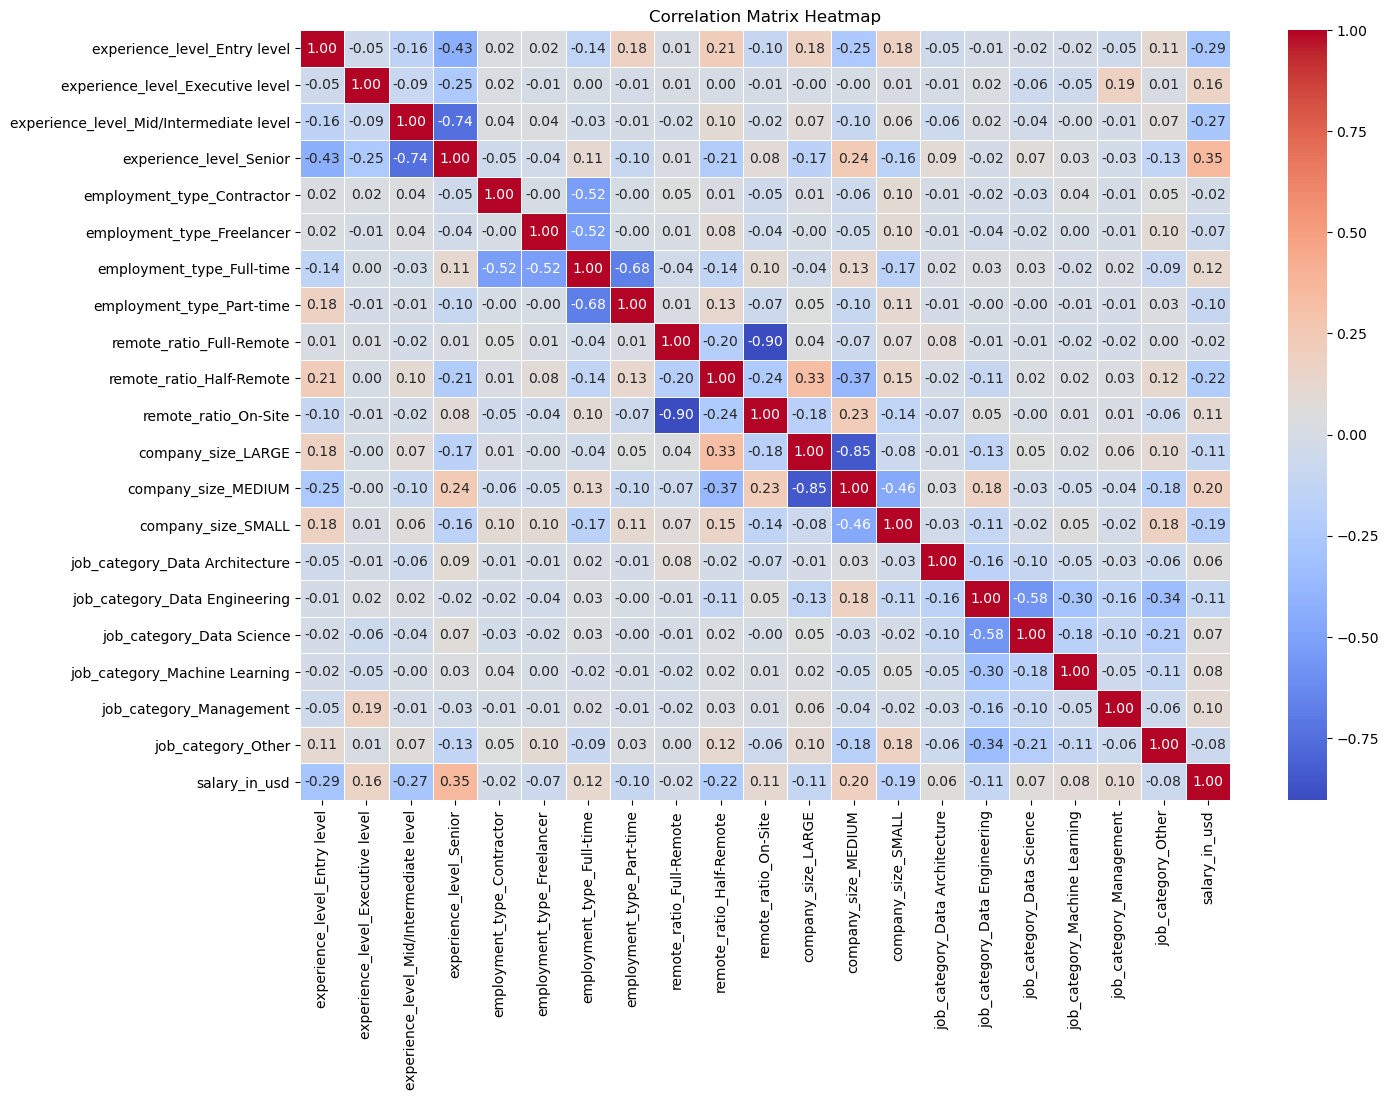

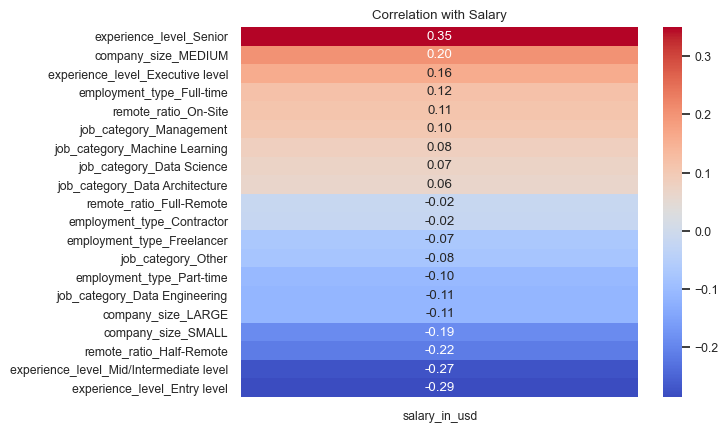

In [68]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['salary_in_usd'].drop('salary_in_usd')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Salary')
plt.show()

# 7.0 Predictive Analysis ✔️

In this study, we aim to build a machine learning model that can predict data job salaries based on a given set of features, such as employment type, job category, experience level, employee residence, remote work ratio, company location, and company size

#### Important Features

experience_level [categorical] : The experience level in the job during the year.

employment_type [categorical] : The type of employment for the role.

job_category [categorical] : The role worked in during the year.

salary_currency [numerical] : The present value salary in USD.

employee_residence [categorical]: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio [ratio]: The overall amount of work done remotely.

company_location [categorical]: The country of the employer's main office or contracting branch.

company_size [categorical]: The median number of people that worked for the company during the year as an ISO 3166 country code.

### Data Preparation

In [73]:
mySalariesDF

,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,Senior,Full-time,85847,Spain,Full-Remote,Spain,LARGE,Other
1,Mid/Intermediate level,Contractor,30000,United States,Full-Remote,United States,SMALL,Machine Learning
2,Mid/Intermediate level,Contractor,25500,United States,Full-Remote,United States,SMALL,Machine Learning
3,Senior,Full-time,175000,Canada,Full-Remote,Canada,MEDIUM,Data Science
4,Senior,Full-time,120000,Canada,Full-Remote,Canada,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...
3750,Senior,Full-time,412000,United States,Full-Remote,United States,LARGE,Data Science
3751,Mid/Intermediate level,Full-time,151000,United States,Full-Remote,United States,LARGE,Other
3752,Entry level,Full-time,105000,United States,Full-Remote,United States,SMALL,Data Science
3753,Entry level,Contractor,100000,United States,Full-Remote,United States,LARGE,Data Engineering


In [ ]:
mySalariesDF = mySalariesDF.drop(['work_year','salary','salary_currency','job_title'], axis=1)

In [74]:
mySalariesDF.head()

,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,Senior,Full-time,85847,Spain,Full-Remote,Spain,LARGE,Other
1,Mid/Intermediate level,Contractor,30000,United States,Full-Remote,United States,SMALL,Machine Learning
2,Mid/Intermediate level,Contractor,25500,United States,Full-Remote,United States,SMALL,Machine Learning
3,Senior,Full-time,175000,Canada,Full-Remote,Canada,MEDIUM,Data Science
4,Senior,Full-time,120000,Canada,Full-Remote,Canada,MEDIUM,Data Science


### Salary Prediction

#### before Remove Outliers with IQR method

In [81]:
myMLdf = mySalariesDF.copy()
myMLdf.shape

(3755, 8)

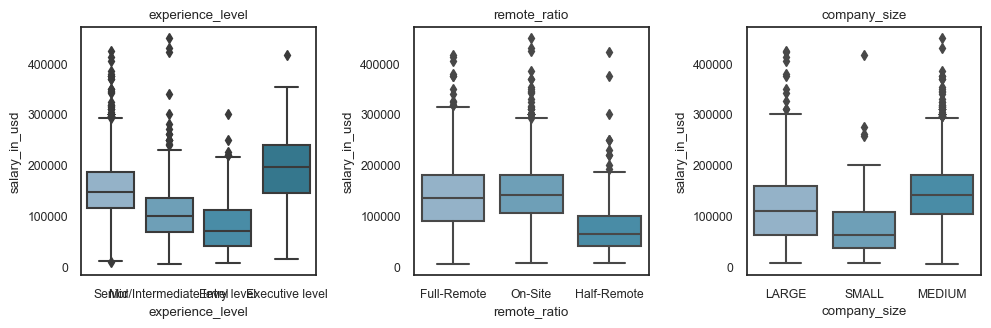

In [82]:
##### Specify the columns
feautures_columns = ['experience_level', 'remote_ratio', 'company_size']

# Set the figure size
plt.figure(figsize=(10, 6))


for feature in feautures_columns:
    plt.subplot(2, 3, feautures_columns.index(feature) + 1)
    sns.boxplot(y='salary_in_usd', x=feature, data=myMLdf)
    plt.title(feature)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

### Removing Outliers with IQR method

In [77]:
# Outlier detection using IQR method
Q1 = myMLdf.quantile(0.25)
Q3 = myMLdf.quantile(0.75)
IQR = Q3 - Q1
myMLdf = myMLdf[~((myMLdf < (Q1 - 1.5 * IQR)) | (myMLdf > (Q3 + 1.5 * IQR))).any(axis=1)]

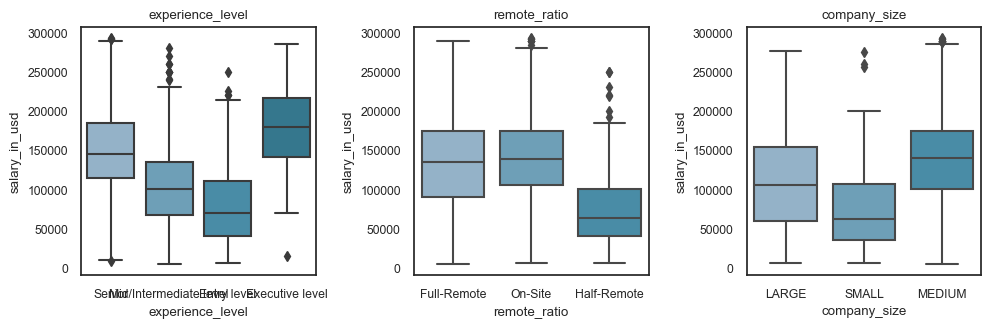

In [79]:
##### Specify the columns
feautures_columns = ['experience_level', 'remote_ratio', 'company_size']

# Set the figure size
plt.figure(figsize=(10, 6))


for feature in feautures_columns:
    plt.subplot(2, 3, feautures_columns.index(feature) + 1)
    sns.boxplot(y='salary_in_usd', x=feature, data=myMLdf)
    plt.title(feature)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [84]:
myMLdf.shape

(3755, 8)

### Categorize salary to seven ranges

In [85]:
# Calculate quantiles for salary bin edges
quantiles = [0, 1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 1]
bin_edges = [myMLdf['salary_in_usd'].quantile(q) for q in quantiles]

# Convert the continuous salary variable into 7 discrete bins based on quantiles
salary_labels = ['low', 'low-mid', 'mid', 'mid-high', 'high', 'very-high', 'Top']
myMLdf['salary_range'] = pd.cut(myMLdf['salary_in_usd'], bins=bin_edges, labels=salary_labels, include_lowest=True)

In [86]:
myMLdf

,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,salary_range
0,Senior,Full-time,85847,Spain,Full-Remote,Spain,LARGE,Other,low-mid
1,Mid/Intermediate level,Contractor,30000,United States,Full-Remote,United States,SMALL,Machine Learning,low
2,Mid/Intermediate level,Contractor,25500,United States,Full-Remote,United States,SMALL,Machine Learning,low
3,Senior,Full-time,175000,Canada,Full-Remote,Canada,MEDIUM,Data Science,very-high
4,Senior,Full-time,120000,Canada,Full-Remote,Canada,MEDIUM,Data Science,mid
...,...,...,...,...,...,...,...,...,...
3750,Senior,Full-time,412000,United States,Full-Remote,United States,LARGE,Data Science,Top
3751,Mid/Intermediate level,Full-time,151000,United States,Full-Remote,United States,LARGE,Other,high
3752,Entry level,Full-time,105000,United States,Full-Remote,United States,SMALL,Data Science,mid
3753,Entry level,Contractor,100000,United States,Full-Remote,United States,LARGE,Data Engineering,low-mid


### Preprocessing

In [87]:
# Label encoding for categorical features
encoder = LabelEncoder()
categorical_features = ['experience_level', 'employment_type','employee_residence', 
                        'remote_ratio', 'company_location', 'company_size', 
                        'job_category', 'salary_range']


for feature in categorical_features:
    myMLdf[feature] = encoder.fit_transform(myMLdf[feature])
# Split the dataset into training and testing sets
X = myMLdf.drop(["salary_in_usd", "salary_range"], axis=1)
y = myMLdf["salary_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X

,experience_level,employment_type,employee_residence,remote_ratio,company_location,company_size,job_category
0,3,2,66,0,62,0,5
1,2,0,75,0,70,2,3
2,2,0,75,0,70,2,3
3,3,2,11,0,12,1,2
4,3,2,11,0,12,1,2
...,...,...,...,...,...,...,...
3750,3,2,75,0,70,0,2
3751,2,2,75,0,70,0,5
3752,0,2,75,0,70,2,2
3753,0,0,75,0,70,0,1


In [89]:
y

0       3
1       2
2       2
3       6
4       4
       ..
3750    0
3751    1
3752    4
3753    3
3754    3
Name: salary_range, Length: 3755, dtype: int32

# 8.0 Traning and Validation ✔️

In [92]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Model training, evaluation, and selection
best_model = None
best_score = -np.inf

print("Model performance:")
for name, model in models:
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
 ##   precision = precision_score(y_test, y_pred)
##    recall = recall_score(y_test, y_pred)
##    f1 = f1_score(y_test, y_pred)
 ##   confusion = confusion_matrix(y_test, y_pred)
 ##   cm = confusion_matrix(y_test, y_pred)
    
    print(f"{name} - Accuracy: {accuracy:.6f}")
 ##   print(f"{name} - confusion_matrix: {cm}")

    
    
    if accuracy > best_score:
        best_score = accuracy
        best_model = pipeline

print(f"Best model: {best_model.named_steps['model']} with accuracy: {best_score:.2f}")

Model performance:
Logistic Regression - Accuracy: 0.250333
Random Forest - Accuracy: 0.287617
Gradient Boosting - Accuracy: 0.304927
Decision Tree - Accuracy: 0.272969
Best model: GradientBoostingClassifier() with accuracy: 0.30


### Confusion Matrix

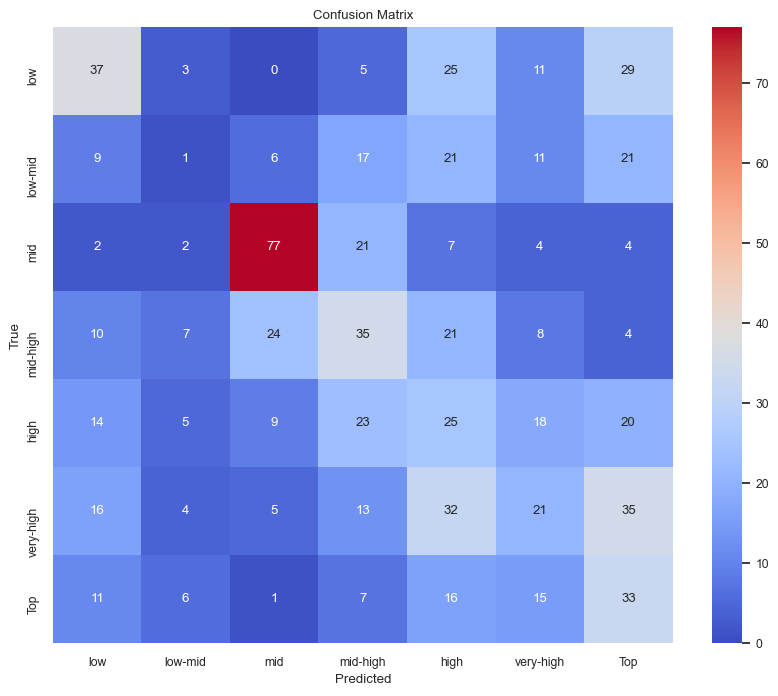

Classification Report:
              precision    recall  f1-score   support

         low       0.37      0.34      0.35       110
     low-mid       0.04      0.01      0.02        86
         mid       0.63      0.66      0.64       117
    mid-high       0.29      0.32      0.30       109
        high       0.17      0.22      0.19       114
   very-high       0.24      0.17      0.20       126
         Top       0.23      0.37      0.28        89

    accuracy                           0.30       751
   macro avg       0.28      0.30      0.28       751
weighted avg       0.29      0.30      0.29       751



In [93]:
# Generate the confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=salary_labels, yticklabels=salary_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=salary_labels))

# 9.0 Tuning Hyperparameters ✔️

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [95]:
# Model Selection
# Create instance for the models to evaluate
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()

### Optimization of Hyperparameters using GridSearchCV - logistic_model

In [96]:
param_grid_lm = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [97]:
grid_search_logistic_model = GridSearchCV(logistic_model, param_grid_lm, scoring='accuracy', cv=5)
grid_search_logistic_model.fit(X_train, y_train)
best_model_logistic = grid_search_logistic_model.best_estimator_

In [98]:
print("Tuned Hyperparameters Logistic :", grid_search_logistic_model.best_params_)
print("best model logistic :", best_model_logistic)
print("Accuracy :",grid_search_logistic_model.best_score_)

Tuned Hyperparameters Logistic : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
best model logistic : LogisticRegression(C=10, penalty='l1', solver='liblinear')
Accuracy : 0.2539966722129784


### Optimization of Hyperparameters using GridSearchCV - Random Forest

In [99]:
param_grid_rf = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
}

In [100]:
# Random Forest
grid_search_random_forest_model = GridSearchCV(random_forest_model, param_grid_rf, scoring='accuracy', cv=5)
grid_search_random_forest_model.fit(X_train, y_train)
best_model_random_forest = grid_search_random_forest_model.best_estimator_

In [101]:
print("Tuned Hyperparameters Random Forest :", grid_search_random_forest_model.best_params_)
print("best model Random Forest :", best_model_random_forest)
print("Accuracy :",grid_search_random_forest_model.best_score_)

Tuned Hyperparameters Random Forest : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
best model Random Forest : RandomForestClassifier(min_samples_leaf=2, n_estimators=300)
Accuracy : 0.3109262340543538


### Optimization of Hyperparameters using GridSearchCV - Decision Tree

In [102]:
param_grid_dt = {
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
}

In [103]:
grid_search_DecisionTree_model =  GridSearchCV(decision_tree_model, param_grid_dt, cv=5)
grid_search_DecisionTree_model.fit(X_train, y_train)
best_model_DecisionTree = grid_search_DecisionTree_model.best_estimator_

In [104]:
print("Tuned Hyperparameters Desicion tree :", grid_search_DecisionTree_model.best_params_)
print("best model Decision Tree :", best_model_DecisionTree)
print("Accuracy :",grid_search_DecisionTree_model.best_score_)

Tuned Hyperparameters Desicion tree : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
best model Decision Tree : DecisionTreeClassifier(max_depth=10, min_samples_split=10)
Accuracy : 0.3046006655574043


# 10.0 Conclusions ✔️

After evaluating the scores, it is evident that the Gradient Boosting Classifier outperforms the other tested models with an accuracy score of 0.30. However, it is important to note that the overall performance of all models appears to be relatively low. This could suggest that the models might struggle to effectively capture the relationship between the features and the target variable (salary_in_usd). Further investigation and potential improvements to the models may be necessary to enhance their predictive capabilities.

### There are several ways to potentially improve the model performance:

Feature Engineering: Create new features or transform existing features to better capture the relationship between the features and the target variable. For example, you could try combining certain categorical features or creating interaction terms between features.

Collect More Data: If possible, gather more data to provide the models with more information to learn from. This can help improve their performance.

### Who makes the most money

In [105]:
# Visualize the adjusted_salary by different categories
cat_columns = ['employment_type', 'job_category', 'experience_level', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

# Determine the best categories for maximizing salary
def get_best_categories(myMLdf, cat_columns):
    best_categories = {}
    for col in cat_columns:
        best_category = myMLdf.groupby(col)['salary_in_usd'].mean().idxmax()
        best_categories[col] = best_category
    return best_categories

best_categories = get_best_categories(df, cat_columns)
print("Best categories for maximizing adjusted salary:")
for key, value in best_categories.items():
    print(f"{key.capitalize()}: {value}")

Best categories for maximizing adjusted salary:
Employment_type: Full-time
Job_category: Management
Experience_level: Executive level
Employee_residence: Israel
Remote_ratio: On-Site
Company_location: Israel
Company_size: MEDIUM
